In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

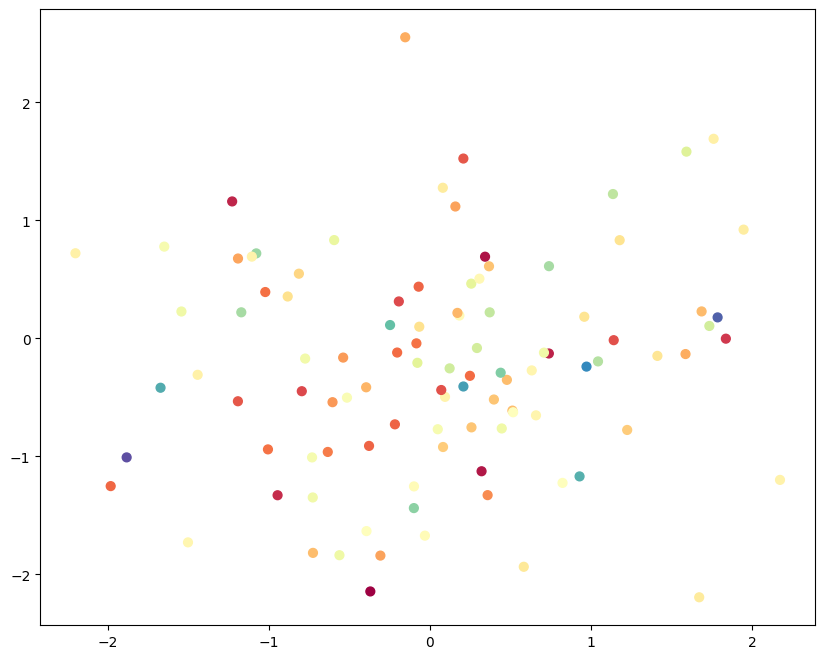

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_regression(n_samples=100)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
max(y)

319.3250575170698

In [4]:
# activation function
def relu(x : np.ndarray) :
    return np.maximum(0,x)

def relu_derivative(x : np.ndarray) :
    x[x<=0] = 0
    x[x>0] = 1
    return x 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def linear_derivative(x):
    return 1

In [5]:
# initalization of some vals

inputs_size = 100
hidden_arr  = [3 ,5, 1]
output_size = 1

In [6]:
# forward equations - weights
np.random.seed(0)
W_1 = np.random.randn(hidden_arr[0], inputs_size) / np.sqrt(hidden_arr[1])
b_1 = np.random.randn(hidden_arr[0], 100)
print("W_1 shape - ", W_1.shape)
print("b_1 shape - ", b_1.shape)

W_2 = np.random.randn(hidden_arr[1], hidden_arr[0]) / np.sqrt(hidden_arr[1])
b_2 = np.random.randn(hidden_arr[1], 100)
print("W_2 shape - ", W_2.shape)
print("b_2 shape - ", b_2.shape)

W_3 = np.random.randn(hidden_arr[2], hidden_arr[1]) / np.sqrt(hidden_arr[1])
b_3 = np.random.randn(hidden_arr[2], 100)
print("W_3 shape - ", W_3.shape)
print("b_3 shape - ", b_3.shape)

W_1 shape -  (3, 100)
b_1 shape -  (3, 100)
W_2 shape -  (5, 3)
b_2 shape -  (5, 100)
W_3 shape -  (1, 5)
b_3 shape -  (1, 100)


In [75]:
X.shape, y.shape

((100, 100), (100,))

In [76]:
# iterations:
# for i in range(100):
#     print(i)
# only for single pass
# output from hidden layers :
Z_1 = W_1 @ (X) + b_1
print(Z_1.shape)
A_1 = relu(Z_1)
print(A_1.shape)

Z_2 = W_2 @ (A_1) + b_2
print(Z_2.shape)
A_2 = relu(Z_2)
print(A_2.shape)

Z_3 = W_3 @ (A_2) + b_3
print(Z_3.shape)

(3, 100)
(3, 100)
(5, 100)
(5, 100)
(1, 100)


In [77]:
def mse_loss(y, y_hat):
    return np.sum(y-y_hat)/len(y)

In [61]:
num_passes = 20000
for i in range(0, num_passes):
    # forward propagation :

    # first layer :
    Z_1 = W_1 @ (X) + b_1
    A_1 = sigmoid(Z_1)
    
    # second layer :
    Z_2 = W_2 @ (A_1) + b_2
    A_2 = sigmoid(Z_2)

    # third layer :
    Z_3 = W_3 @ (A_2) + b_3


    # backpropagation :
    ## calculate error in the output layer :
    error = y-Z_3

    ## compute the gradients for the weights and biases :
    delta_output = error * linear_derivative(Z_3)
    print("delta_output ", delta_output.shape)
    print("W_3.T ", W_3.T.shape)
    print("Z_3.T ", Z_3.shape)
    delta_hidden_Z_2 = np.dot(delta_output, W_3.T) #* sigmoid_derivative(A_2)
    # delta_hidden_Z_1 = np.dot(delta_hidden_Z_2, W_2.T) * sigmoid_derivative(A_1)

    # delta_3 = Z_3 - y

    # # Compute the error and delta for the second layer
    # delta_2 = np.dot(W_3.T, delta_3) * sigmoid_derivative(Z_2)

    # # Compute the error and delta for the first layer
    # delta_1 = np.dot(W_2.T, delta_2) * sigmoid_derivative(Z_1)

    break
    W_3 += np.dot(Z_3.T, delta_output)
    W_2 += np.dot(Z_2.T, delta_hidden_Z_2)
    W_1 += np.dot(Z_1.T, delta_hidden_Z_1)

    b_3 += np.sum(delta_output, axis=0)
    b_2 += np.sum(delta_hidden_Z_2, axis=0)
    b_1 += np.sum(delta_hidden_Z_1, axis=0)


    #loss :
    loss  = mse_loss(y, Z_3)
    # data_loss = np.sum(loss)/inputs_size
    if i % 10 == 0:
        print ("iteration %d: loss %f" % (i, loss))

    

delta_output  (1, 100)
W_3.T  (5, 1)
Z_3.T  (1, 100)


ValueError: shapes (1,100) and (5,1) not aligned: 100 (dim 1) != 5 (dim 0)

In [9]:
y=y/319.3250575170698

In [16]:
limit = np.sqrt(6 / float(100))
W = np.random.uniform(low=-limit, high=limit, size=(100, 1))

np.random.seed(0)
W_1 =np.random.uniform(low=-limit, high=limit, size=(hidden_arr[0], inputs_size)) # np.random.randn(hidden_arr[0], inputs_size) #/ np.sqrt(hidden_arr[1])
b_1 = np.random.uniform(low=-limit, high=limit, size=(hidden_arr[0], inputs_size))
print("W_1 shape - ", W_1.shape)
print("b_1 shape - ", b_1.shape)

W_2 = np.random.uniform(low=-limit, high=limit, size=(hidden_arr[1], hidden_arr[0])) #np.random.randn(hidden_arr[1], hidden_arr[0]) #/ np.sqrt(hidden_arr[1])
b_2 = np.random.uniform(low=-limit, high=limit, size=(hidden_arr[1], 100))
print("W_2 shape - ", W_2.shape)
print("b_2 shape - ", b_2.shape)

W_3 = np.random.uniform(low=-limit, high=limit, size=(hidden_arr[2], hidden_arr[1])) #np.random.randn(hidden_arr[2], hidden_arr[1]) #/ np.sqrt(hidden_arr[1])
b_3 = np.random.uniform(low=-limit, high=limit, size=(hidden_arr[2], 100))
print("W_3 shape - ", W_3.shape)
print("b_3 shape - ", b_3.shape)

from sklearn.metrics import mean_squared_error


learn_rate = 0.0001
num_passes = 1000
y = y.reshape(1,100)
for i in range(0, num_passes):
    
    # Forward propagation
    Z_1 = np.dot(W_1, X) + b_1
    A_1 = relu(Z_1)

    Z_2 = np.dot(W_2, A_1) + b_2
    A_2 = relu(Z_2)
    
    Z_3 = np.dot(W_3, A_2) + b_3
    A_3 = sigmoid(Z_3)

    loss = mean_squared_error(y, A_3)
    
    # Backpropagation
    delta_o = y - A_3
    # print(Z_3)
    # Gradient updates for the output layer
    dW_3 = learn_rate * np.dot(delta_o, A_2.T)
    db_3 = learn_rate * np.mean(delta_o, axis=1, keepdims=True)

    # Gradient updates for the second layer
    delta_h2 = np.dot(W_3.T, delta_o) * relu_derivative(Z_2)
    dW_2 = learn_rate * np.dot(delta_h2, A_1.T)
    db_2 = learn_rate * np.mean(delta_h2, axis=1, keepdims=True)

    # Gradient updates for the first layer
    delta_h1 = np.dot(W_2.T, delta_h2) * relu_derivative(Z_1)
    dW_1 = learn_rate * np.dot(delta_h1, X.T)
    db_1 = learn_rate * np.mean(delta_h1, axis=1, keepdims=True)

    # Update weights and biases
    W_3 += dW_3
    b_3 += db_3
    W_2 += dW_2
    b_2 += db_2
    W_1 += dW_1
    b_1 += db_1

    if i % 1 == 0:
        print("Iteration %d: Loss %f" % (i, loss))
    

W_1 shape -  (3, 100)
b_1 shape -  (3, 100)
W_2 shape -  (5, 3)
b_2 shape -  (5, 100)
W_3 shape -  (1, 5)
b_3 shape -  (1, 100)
Iteration 0: Loss 0.499741
Iteration 1: Loss 0.499660
Iteration 2: Loss 0.499581
Iteration 3: Loss 0.499501
Iteration 4: Loss 0.499422
Iteration 5: Loss 0.499344
Iteration 6: Loss 0.499266
Iteration 7: Loss 0.499189
Iteration 8: Loss 0.499112
Iteration 9: Loss 0.499036
Iteration 10: Loss 0.498960
Iteration 11: Loss 0.498885
Iteration 12: Loss 0.498809
Iteration 13: Loss 0.498735
Iteration 14: Loss 0.498660
Iteration 15: Loss 0.498586
Iteration 16: Loss 0.498512
Iteration 17: Loss 0.498439
Iteration 18: Loss 0.498366
Iteration 19: Loss 0.498293
Iteration 20: Loss 0.498221
Iteration 21: Loss 0.498149
Iteration 22: Loss 0.498077
Iteration 23: Loss 0.498006
Iteration 24: Loss 0.497935
Iteration 25: Loss 0.497864
Iteration 26: Loss 0.497794
Iteration 27: Loss 0.497724
Iteration 28: Loss 0.497654
Iteration 29: Loss 0.497585
Iteration 30: Loss 0.497516
Iteration 31: 

In [12]:
0.498366 - 0.147968

0.350398

In [145]:
import numpy as np

# Initialize the weights and biases
np.random.seed(0)
input_size = 10
hidden_size = 20
output_size = 1

W_1 = np.random.randn(hidden_size, input_size) * 0.01
b_1 = np.zeros((hidden_size, 1))
W_2 = np.random.randn(hidden_size, hidden_size) * 0.01
b_2 = np.zeros((hidden_size, 1))
W_3 = np.random.randn(output_size, hidden_size) * 0.01
b_3 = np.zeros((output_size, 1))

learning_rate = 0.01
num_passes = 100

# Forward propagation and backpropagation
for i in range(num_passes):
    # Forward propagation
    Z_1 = np.dot(W_1, X) + b_1
    A_1 = sigmoid(Z_1)

    Z_2 = np.dot(W_2, A_1) + b_2
    A_2 = sigmoid(Z_2)

    Z_3 = np.dot(W_3, A_2) + b_3

    loss = np.mean(np.square(y - Z_3))

    # Backpropagation
    delta_3 = Z_3 - y

    delta_2 = np.dot(W_3.T, delta_3) * sigmoid_derivative(Z_2)

    delta_1 = np.dot(W_2.T, delta_2) * sigmoid_derivative(Z_1)

    dW_3 = (1 / y.shape[1]) * np.dot(delta_3, A_2.T)
    db_3 = (1 / y.shape[1]) * np.sum(delta_3, axis=1, keepdims=True)

    dW_2 = (1 / y.shape[1]) * np.dot(delta_2, A_1.T)
    db_2 = (1 / y.shape[1]) * np.sum(delta_2, axis=1, keepdims=True)

    dW_1 = (1 / y.shape[1]) * np.dot(delta_1, X.T)
    db_1 = (1 / y.shape[1]) * np.sum(delta_1, axis=1, keepdims=True)

    # Update weights and biases
    W_3 -= learning_rate * dW_3
    b_3 -= learning_rate * db_3

    W_2 -= learning_rate * dW_2
    b_2 -= learning_rate * db_2

    W_1 -= learning_rate * dW_1
    b_1 -= learning_rate * db_1

    if i % 10 == 0:
        print("Iteration %d: Loss %f" % (i, loss))


ValueError: shapes (20,10) and (100,100) not aligned: 10 (dim 1) != 100 (dim 0)

In [29]:
import numpy as np

# Define sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define forward propagation and backpropagation
def train_neural_network(X, y, num_passes, learning_rate):
    # Initialize weights and biases
    np.random.seed(0)
    input_size = X.shape[0]
    hidden_size = 20
    output_size = 1

    W_1 = np.random.randn(hidden_size, input_size) * 0.01
    b_1 = np.zeros((hidden_size, 1))
    W_2 = np.random.randn(hidden_size, hidden_size) * 0.01
    b_2 = np.zeros((hidden_size, 1))
    W_3 = np.random.randn(output_size, hidden_size) * 0.01
    b_3 = np.zeros((output_size, 1))

    # Training loop
    for i in range(num_passes):
        # Forward propagation
        Z_1 = np.dot(W_1, X) + b_1
        A_1 = sigmoid(Z_1)

        Z_2 = np.dot(W_2, A_1) + b_2
        A_2 = sigmoid(Z_2)

        Z_3 = np.dot(W_3, A_2) + b_3

        loss = np.mean(np.square(y - Z_3))

        # Backpropagation
        delta_3 = Z_3 - y

        delta_2 = np.dot(W_3.T, delta_3) * sigmoid_derivative(Z_2)

        delta_1 = np.dot(W_2.T, delta_2) * sigmoid_derivative(Z_1)

        dW_3 = (1 / y.shape[1]) * np.dot(delta_3, A_2.T)
        db_3 = (1 / y.shape[1]) * np.sum(delta_3, axis=1, keepdims=True)

        dW_2 = (1 / y.shape[1]) * np.dot(delta_2, A_1.T)
        db_2 = (1 / y.shape[1]) * np.sum(delta_2, axis=1, keepdims=True)

        dW_1 = (1 / y.shape[1]) * np.dot(delta_1, X.T)
        db_1 = (1 / y.shape[1]) * np.sum(delta_1, axis=1, keepdims=True)

        # Update weights and biases
        W_3 -= learning_rate * dW_3
        b_3 -= learning_rate * db_3

        W_2 -= learning_rate * dW_2
        b_2 -= learning_rate * db_2

        W_1 -= learning_rate * dW_1
        b_1 -= learning_rate * db_1

        if i % 10 == 0:
            print("Iteration %d: Loss %f" % (i, loss))

# Example usage
X = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[0.5, 0.7]])

num_passes = 100
learning_rate = 0.01

train_neural_network(X, y, num_passes, learning_rate)


ValueError: operands could not be broadcast together with shapes (1,2) (1,3) 

Epoch 1/5000, Mean Squared Error: 0.2873851253213669
Epoch 2/5000, Mean Squared Error: 0.26777660180105195
Epoch 3/5000, Mean Squared Error: 0.2581525098198413
Epoch 4/5000, Mean Squared Error: 0.25411890796422437
Epoch 5/5000, Mean Squared Error: 0.2524797420012009
Epoch 6/5000, Mean Squared Error: 0.25175813804410613
Epoch 7/5000, Mean Squared Error: 0.25137821731101023
Epoch 8/5000, Mean Squared Error: 0.2511278061471214
Epoch 9/5000, Mean Squared Error: 0.25092975260851297
Epoch 10/5000, Mean Squared Error: 0.2507557851556964
Epoch 11/5000, Mean Squared Error: 0.25059522552260916
Epoch 12/5000, Mean Squared Error: 0.2504437398732449
Epoch 13/5000, Mean Squared Error: 0.2502993042009034
Epoch 14/5000, Mean Squared Error: 0.2501607570502834
Epoch 15/5000, Mean Squared Error: 0.2500272789873602
Epoch 16/5000, Mean Squared Error: 0.24989820375824007
Epoch 17/5000, Mean Squared Error: 0.24977294812898237
Epoch 18/5000, Mean Squared Error: 0.249650984256509
Epoch 19/5000, Mean Squared Er